# WiDS Datathon 2023
## Adapting to Climate Change by Improving Extreme Weather Forecasts

Accurate long-term forecasts of temperature and precipitation are crucial to help people prepare and adapt to these extreme weather events. Currently, purely physics-based models dominate short-term weather forecasting. But these models have a limited forecast horizon. The availability of meteorological data offers an opportunity for data scientists to improve sub-seasonal forecasts by blending physics-based forecasts with machine learning. Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to more than 45 days) would help communities and industries adapt to the challenges brought on by climate change.

This year’s datathon, organized by the WiDS Worldwide team at Stanford University, Harvard University IACS, Arthur, and the WiDS Datathon Committee, will focus on longer-term weather forecasting to help communities adapt to extreme weather events caused by climate change.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm as svm
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor as grb


import warnings # Supress warnings
warnings.filterwarnings("ignore")

# Reading data
___

In [ ]:
# Reading the clean train dataset
train_df = pd.read_csv("data/train_data.csv")
print(f'The shape of the dataset is: {train_df.shape}')
train_df.head()

The shape of the dataset is: (375734, 246)


,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [ ]:
# Reading the clean test dataset
test_df = pd.read_csv("data/test_data.csv")
print(f'The shape of the dataset is: {test_df.shape}')
test_df.head()

The shape of the dataset is: (31354, 245)


,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [ ]:
# identifying the target column
target = [feature for feature in train_df.columns if feature not in test_df.columns][0]
print(target)

contest-tmp2m-14d__tmp2m


**Observations**
- Each row in the data corresponds to a single location and a single start date for the two-week period.
- The data provided for each date is a combination of:
    - weather and climate information for a number of US locations,
    - for a number of start dates for the two-week observation,
    - as well as the forecasted temperature and precipitation from a number of weather forecast models
- The train dataset has a shape of (375734, 246) while the test dataset is much smaller at (31354, 245).
___
- Target : contest-tmp2m-14d__tmp2m
    - "TMP2m" typically refers to the "2-meter temperature," which is a measurement of the air temperature at a height of 2 meters above the surface of the Earth. 
    - In this competition the target refers to the to the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.
    - Makes this a continous regression problem.

# EDA
___

## Basic overview of the features

In [ ]:
train_df.describe().style.background_gradient(cmap="Pastel1")

In [ ]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,4
1,float64,240
2,object,2


In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols

Index(['startdate', 'climateregions__climateregion'], dtype='object')

**Observations**
- Our dataset is mostly numeric with only two categorical columns.
- It's also evident that we have missing values in pur dataset. _We deal with this in the next few cells..._
- First we explore the categorical columns

### Exploring the location features

In [ ]:
train_df['startdate'].value_counts()

9/1/14      514
12/25/15    514
12/27/15    514
12/28/15    514
12/29/15    514
           ... 
5/4/15      514
5/5/15      514
5/6/15      514
5/7/15      514
8/31/16     514
Name: startdate, Length: 731, dtype: int64

In [ ]:
test_df['startdate'].value_counts()

11/1/22     514
12/2/22     514
12/4/22     514
12/5/22     514
12/6/22     514
           ... 
11/26/22    514
11/27/22    514
11/28/22    514
11/29/22    514
12/31/22    514
Name: startdate, Length: 61, dtype: int64

- For each date in both train and test, we have 514 unique values meaning we have 514 unique locations.

In [ ]:
# creating a new feature describing the unique locations in train

train_df['loc_group'] = train_df.groupby(['lat','lon']).ngroup()
print(f'There are {train_df.loc_group.nunique()} unique locations in the train dataset')
train_df.shape

There are 514 unique locations in the train dataset


(375734, 247)

In [ ]:
# creating a new feature describing the unique locations in test

test_df['loc_group'] = test_df.groupby(['lat','lon']).ngroup()
print(f'There are {test_df.loc_group.nunique()} unique locations in the test dataset')
test_df.shape

There are 514 unique locations in the test dataset


(31354, 246)

In [ ]:
# Checking for the different locations between train and test das
print('Locations in train that are not in test')
locations_train=list(train_df.loc_group.unique())
locations_test=list(test_df.loc_group.unique())
result_1 = list(set(locations_train).difference(locations_test))
print(result_1)

print('Locations in test that are not in train')
result_2=list(set(locations_test).difference(locations_train))
print(result_2)


Locations in train that are not in test
[]
Locations in test that are not in train
[]


**Observations**
- After reveiwing the competition discussions and notebooks, we found that [Flavia Felicioni](https://www.kaggle.com/flaviafelicioni) had investigated this issue in her notebook [WiDS 2023: different locations train/test SOLVED](https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved) and found that this issue is caused due to rounding differences between training and test data.
- She proposes to truncate the original latitude/longitude coordinates and re-create the location features in order to solve this issue.


In [ ]:
# creating a new feature describing unique locations in train
scale = 14

train_df.loc[:,'lat']=round(train_df.lat,scale)
train_df.loc[:,'lon']=round(train_df.lon,scale)

test_df.loc[:,'lat']=round(test_df.lat,scale)
test_df.loc[:,'lon']=round(test_df.lon,scale)

# creating a new feature describing the unique locations in train
train_df['loc_group'] = train_df.groupby(['lat','lon']).ngroup()
print(f'There are {train_df.loc_group.nunique()} unique locations in the train dataset')

# creating a new feature describing the unique locations in test
test_df['loc_group'] = test_df.groupby(['lat','lon']).ngroup()
print(f'There are {test_df.loc_group.nunique()} unique locations in the test dataset')

print('Locations in train that are not in test')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])

There are 514 unique locations in the train dataset
There are 514 unique locations in the test dataset
Locations in train that are not in test
[]
Locations in test that are not in train
[]


### Exploraing the startdate feature

In [ ]:
# converting the startdate feature to datettime datatype for easier pre-processing
train_df.startdate = pd.to_datetime(train_df.startdate)
test_df.startdate = pd.to_datetime(test_df.startdate)

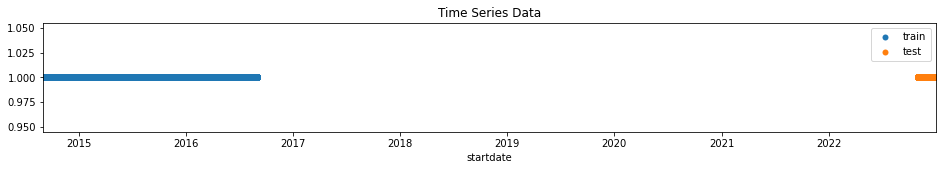

In [ ]:
# visualising the time series problem
fig, ax = plt.subplots(1,1, figsize=(16,2))
ax.set_title('Time Series Data')
sns.scatterplot(data = train_df, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'train')
sns.scatterplot(data = test_df, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'test')
ax.set_xlim([train_df['startdate'].iloc[0], test_df['startdate'].iloc[-1]])
plt.show()

**Observations**
- We have 713 unique start dates from 9th September 2014 to 31st August 2016.
- We have a time series problem with a big time gap between the training and the testing data.

## Dealing with missing values

In [ ]:
# missing value 
train_df.isna().sum().sort_values(ascending=False)

nmme0-prate-34w__ccsm30    15934
nmme0-tmp2m-34w__ccsm30    15934
ccsm30                     15934
nmme0-prate-56w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
                           ...  
ccsm40                         0
cfsv20                         0
gfdlflora0                     0
gfdlflorb0                     0
loc_group                      0
Length: 247, dtype: int64

In [ ]:
null_cols = train_df.columns[train_df.isna().any()]
null_cols

Index(['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3',
       'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30',
       'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3',
       'nmme-tmp2m-34w__ccsm3', 'ccsm30'],
      dtype='object')

**Observations**
- It seems we have missing values in the model forecast features.
- Since these features are forecasts for each day, the value of one row is bound to be similar to the value for the next row since they are in the same date range and weather changes slowly over time.
- We will hence use the missing values with the previous row value  using the forward fill method (df.ffill()).

In [ ]:
train_df = train_df.sort_values(by=['loc_group', 'startdate']).ffill()

In [ ]:
# confirming we've filled missing value 
train_df.isna().sum().sort_values(ascending=False)

index                                       0
wind-hgt-850-2010-10                        0
sst-2010-2                                  0
sst-2010-3                                  0
sst-2010-4                                  0
                                           ..
contest-wind-uwnd-925-14d__wind-uwnd-925    0
contest-wind-h500-14d__wind-hgt-500         0
cancm30                                     0
cancm40                                     0
loc_group                                   0
Length: 247, dtype: int64

In [ ]:
# checking for duplicate rows  
train_df.duplicated().sum()

0

In [ ]:
# Checking for features with constant values
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_cols = unique_df[unique_df["unique_count"]==1]
constant_cols

,col_name,unique_count


**Observations**
- Our data now has no missing values
- Our data also has no duplicate rows or constant columns

# Feature Engineering

## Encoding the categorical features

In [ ]:
# encoding the climateregions__climateregion feature using label encoding
encoder = preprocessing.LabelEncoder()
train_df['climateregions__climateregion'] = encoder.fit_transform(train_df['climateregions__climateregion'])
test_df['climateregions__climateregion'] = encoder.transform(test_df['climateregions__climateregion'])

train_df['climateregions__climateregion'].value_counts()

1     139621
9      52632
4      51901
7      40936
8      22661
3      13889
10     12427
2       9503
6       9503
11      8041
0       5117
5       4386
12      2924
13      1462
14       731
Name: climateregions__climateregion, dtype: int64

In [ ]:
# creating new features from the startdate feature
month_to_season = {
      1: 0,
      2: 0,
      3: 1, # spring
      4: 1,
      5: 1,
      6: 2, # summer
      7: 2,
      8: 2, 
      9: 3, # fall
      10: 3,
      11: 3,
      12: 0 # winter
    }

def create_time_features(df):
    df = df.copy()
    df['quarter'] = df.startdate.dt.quarter
    df['month'] = df.startdate.dt.month
    df['season'] = df['month'].apply(lambda x: month_to_season[x])
    df['week'] = df.startdate.dt.weekofyear
    df['dayofyear'] = df.startdate.dt.day_of_year
    return df

train_df = create_time_features(train_df)
test_df = create_time_features(test_df)
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,loc_group,quarter,month,season,week,dayofyear
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,...,28.09,-13.50,11.90,4.58,0,3,9,3,36,244
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,...,27.41,-23.77,15.44,3.42,0,3,9,3,36,245
2,2,0.0,0.833333,2014-09-03,220.69,29.02,31.64,29.57,30.73,29.71,...,19.21,-33.16,15.11,4.82,0,3,9,3,36,246
3,3,0.0,0.833333,2014-09-04,225.28,29.02,31.64,29.57,30.73,29.71,...,8.29,-37.22,18.24,9.74,0,3,9,3,36,247
4,4,0.0,0.833333,2014-09-05,237.24,29.02,31.64,29.57,30.73,29.71,...,-2.58,-42.30,21.91,10.95,0,3,9,3,36,248


# Modelling

- We will also be using LightGBM as our baseline model
- We will also be using cross validation to prevent overfitting on train

In [ ]:
# Select main columns to be used in training
main_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate'])
X = train_df[main_cols]
y = train_df['contest-tmp2m-14d__tmp2m']
test_X = test_df.drop(['index', 'startdate'], axis=1)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(263013, 249)
(112721, 249)


In [ ]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 55,
        "min_child_samples" : 100,
        "learning_rate" : 0.03,
        "bagging_fraction" : 0.78,
        "feature_fraction" : 0.78,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "reg_alpha" : 0.48,
        "reg_lambda" : 0.48
    }

    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 7000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

In [ ]:
# Training the model
pred_test, model, pred_val = run_lgb(X_train, y_train, X_test, y_test, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.35229
[200]	valid_0's rmse: 0.897654
[300]	valid_0's rmse: 0.747481
[400]	valid_0's rmse: 0.66476
[500]	valid_0's rmse: 0.611521
[600]	valid_0's rmse: 0.574889
[700]	valid_0's rmse: 0.545852
[800]	valid_0's rmse: 0.520688
[900]	valid_0's rmse: 0.499204
[1000]	valid_0's rmse: 0.479197
[1100]	valid_0's rmse: 0.463202
[1200]	valid_0's rmse: 0.447857
[1300]	valid_0's rmse: 0.434895
[1400]	valid_0's rmse: 0.422815
[1500]	valid_0's rmse: 0.41106
[1600]	valid_0's rmse: 0.400792
[1700]	valid_0's rmse: 0.391545
[1800]	valid_0's rmse: 0.383086
[1900]	valid_0's rmse: 0.375087
[2000]	valid_0's rmse: 0.367393
[2100]	valid_0's rmse: 0.360552
[2200]	valid_0's rmse: 0.353971
[2300]	valid_0's rmse: 0.347789
[2400]	valid_0's rmse: 0.342085
[2500]	valid_0's rmse: 0.33691
[2600]	valid_0's rmse: 0.331849
[2700]	valid_0's rmse: 0.327018
[2800]	valid_0's rmse: 0.322497
[2900]	valid_0's rmse: 0.317886
[3000]	valid_0's rmse:

## Feature Importance

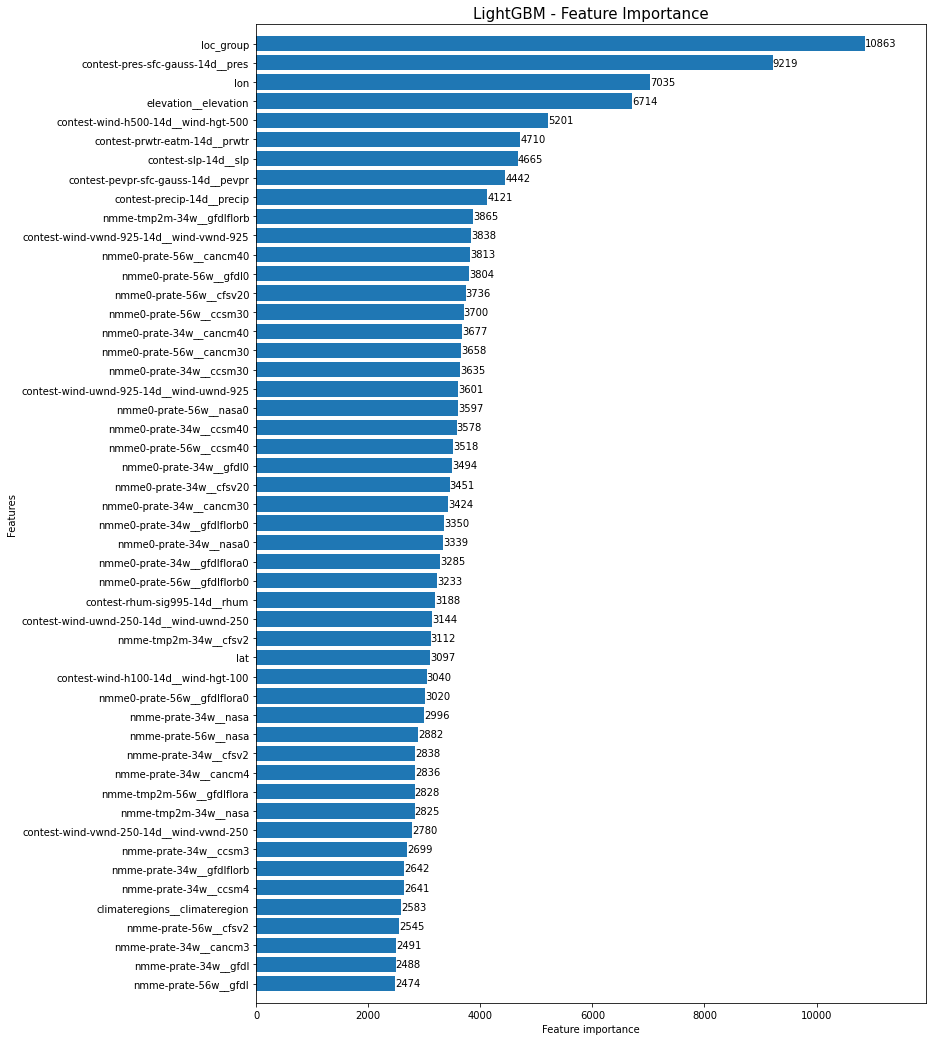

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# Predictions on the test data

In [ ]:
submission = pd.read_csv('data/sample_solution.csv')
submission

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738
...,...,...
31349,28.303967,407083
31350,26.635933,407084
31351,27.057762,407085
31352,26.871066,407086


In [ ]:
submission[target] = model.predict(test_X)
submission

,contest-tmp2m-14d__tmp2m,index
0,13.519656,375734
1,13.671058,375735
2,13.524223,375736
3,13.644266,375737
4,13.541442,375738
...,...,...
31349,6.174349,407083
31350,5.629810,407084
31351,5.533367,407085
31352,5.190767,407086


In [ ]:
submission.to_csv('submission.csv', index = False) 

# TODO

## On EDA & Pre-processing
- Check for feature distribution
- Check for feature importance ( through correlation & collinearity )
- Check for target distribution
- Explore the time series problem 
    - [Data Drift Problem - WiDs 2023](https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=fSugaG6JqbuK)
    - [Info article](https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467)

## On Feature Engineering
- Use what we know about the following features to create new more meaningful data:
    - nmme model forecasts
    - wind
    - precipitation
    - pressure (both sea and atmospheric)
    - mjo
    - mei
    - ice concentration
    - sea surface temperature

## Modelling
- Hyperparameter Tuning
- More models

## On Visualisation
- Visualise the dire state of the climate based on the target feature
    - Show rise of temperature over the given time period
    - State why this is such a bad thing
    - State why we need better forecast models (how they'd help better the climate)
- Visualise how different features affect rise in temperature
    - State possible human activities that cause this
    - Relate this to how humans can better improve the climate
    - This [notebook](https://www.kaggle.com/code/khsamaha/eda-wids-datathon-2023/report) here does this so beautifully (itallian chef hand emoji)
- Visualise what our predictions mean
    - Explain if it forecasts good stuff or bad
    - If good then how do we keep it that way
    - If bad then how do we improve
- Make slides for this ... amybe even a whole sperate notebook just for visualisations!